# Churn Analysis of Telco Customer database

### Life cycle of Machine learning Project 

<ul>
  <li>Understanding the problem statement</li>
  <li>Data collection</li>
  <li>Data checks to perform</li>
  <li>Exploratory data analysis</li>
  <li>Data Pre-processing</li>
  <li>Model trainning</li>
  <li>Choose the best model</li>
</ul>

## 1) Problem Statement


The main objectives of this work is to identify the factors influencing churn and create a model to predict churn.

## 2) Data Colection

### 2.1) Importing data and required packages

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

Read csv file

In [44]:
data_df = pd.read_csv("D:\Repositories\ml-churn/artifacts\data_ingestion\main_data.csv")

Printing the first 5 elements

In [45]:
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.2) Dataset information

<ul>
  <li>CustomerID: ID asigned to customers (ID)</li>
  <li>Gender: Whether a customer is a male or female (male / female)</li>
  <li>SeniorCitizen: Whether a customer is a senior citizen or not ( 1 / 0)</li>
  <li>Partner: Whether a customer has a partner or not (Yes / No)</li>
  <li>Dependendents: Whether a customer has dependents or not (Yes / No )</li>
  <li>Tenure: Number of months the customer has stayed with the company (Number)</li>
  <li>PhoneService: Whether a customer has a phone service or not (Yes / No)</li>
  <li>MultipleLines: Whether the customer has multiple lines (Yes / No / No phone service)</li>
  <li>InternetService: Category (DSL / Fiber optic / No)</li>
  <li>OnlineSecurity: Whether a customer has online security or not (Yes / No / No internet service)</li>
  <li>OnlineBackup: Whether a customer have online backup or not (Yes / No / No internet service)</li>
  <li>DeviceProtection: Whether a customer has device protection or not (Yes / No / No internet service)</li>
  <li>TechSupport: Whether a customer has support or not (Yes / No / No internet service)</li>
  <li>StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)</li>
  <li>StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)</li>
  <li>Contract: The contract term of the customer (Month-to-month, One year, Two year)</li>
  <li>PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)</li>
  <li>PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))</li>
  <li>MonthlyCharges: The amount charged to the customer monthly</li>
  <li>TotalCharges: The total amount charged to the customer</li>
  <li>Churn: Whether the customer churned or not (Yes or No)</li>
</ul>

### 2.3) Data checks to perform

<ul>
  <li>Check missing values</li>
  <li>Check duplicates</li>
  <li>Check data types</li>
  <li>Check the number of uniques values in each column</li>
  <li>Check statistics of the data set</li>
</ul>

#### 2.31) Check missing values

In [46]:
data_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 2.32) Check Duplicates

In [47]:
data_df.duplicated().sum()

0

#### 2.33) Check data types

In [48]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Droping Na from data_df

In [49]:
data_df.dropna(inplace=True)

### 2.4) Exploring Data

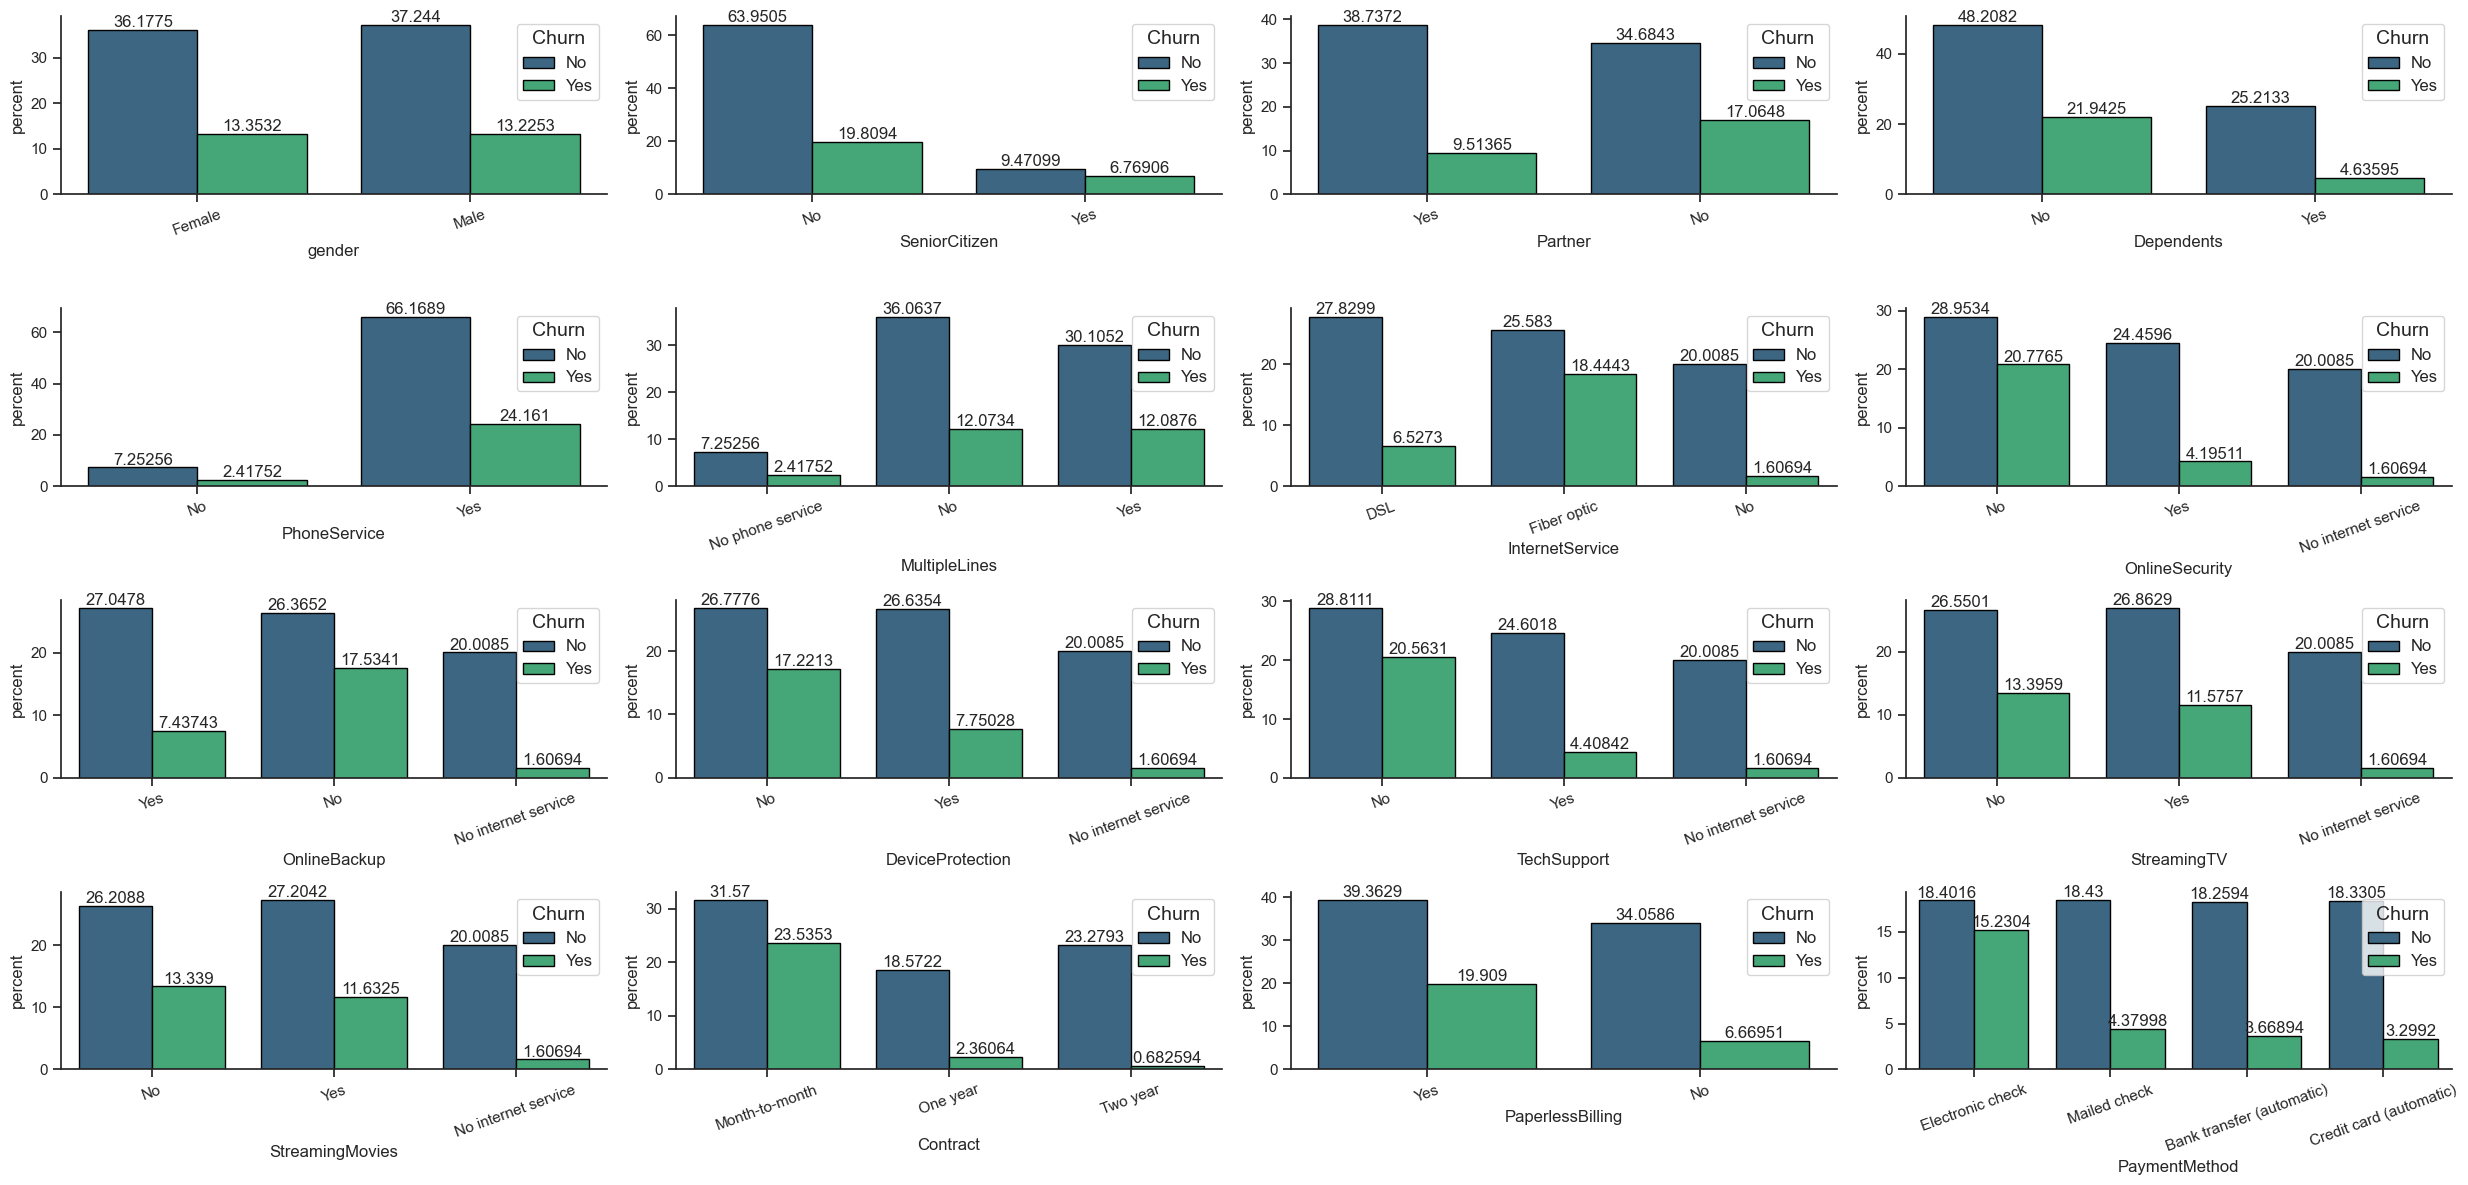

In [50]:
fig, ax = plt.subplots(4,4, figsize=(25,12))
axes = ax.ravel()

names = list(data_df.drop(columns=["Churn", "customerID","tenure"]).columns)

for name, axis in zip(names,axes):
    sns.countplot(x=data_df[name], hue=data_df["Churn"] , palette="viridis", ax=axis, stat="percent", edgecolor = 'Black')
    axis.tick_params(axis='x', rotation=20)
    plt.setp(axis.get_legend().get_texts(), fontsize='12') # for legend text
    plt.setp(axis.get_legend().get_title(), fontsize='14') # for legend title
    for container in axis.containers:
        axis.bar_label(container)


plt.tight_layout()


Among the variables that shows effect over Churn, <i>Partner</i> shows that people with partners leave our service less times.
People that have <i>Dependents</i> tends to leave our service less times. 


Among our services, Interne service, specially Fiber Optic shows a high rate of Churn, this service should be inspected, or the reason to leave this service. Reasons can vary from another provider to a bad service.

People that hire more than 1 internet aditional service shows a lower rate of Churn.

According to the type of contract, it can be observed that Month-to-Month contracts shows the higher Churn rate, this can be another sympthom of another provider or due to different types of clients.

People that do PaperlessBilling have a higher rate of Churn.

Among the payment methods, people that use Electronic Checks have a higher rate of Churn. A good strategy can be to push people to use another system.

In [51]:
# fig, ax = plt.subplots(1,3, figsize=(18,3))
# axes = ax.ravel()

# names = list(["tenure","MonthlyCharges","TotalCharges"])
# cat_vars = list(data_df.drop(columns=["customerID","tenure","MonthlyCharges","TotalCharges"]).columns)

# for cat_var in cat_vars:
#     fig, ax = plt.subplots(1,3, figsize=(16,4))
#     axes = ax.ravel()
#     for name, axis in zip(names,axes):
#         sns.kdeplot(x=data_df[name], hue=data_df[cat_var] , palette="viridis", ax=axis)
#         axis.tick_params(axis='x', rotation=20)
#         plt.setp(axis.get_legend().get_texts(), fontsize='10') # for legend text
#         plt.setp(axis.get_legend().get_title(), fontsize='12') # for legend title
#         for container in axis.containers:
#             axis.bar_label(container)


# plt.tight_layout()

In [52]:
from scipy.signal import find_peaks
names = ["tenure","MonthlyCharges","TotalCharges"]

In [53]:
def kdeplot_with_lines(names, hue_variable):
    fig, ax = plt.subplots(1,3, figsize=(18,3))
    axes = ax.ravel()

    for name, axis in zip(names,axes):
        sns.kdeplot(x=data_df[name], hue=data_df[hue_variable] , palette="viridis", ax=axis)
        axis.tick_params(axis='x', rotation=20)
        plt.setp(axis.get_legend().get_texts(), fontsize='10') # for legend text
        plt.setp(axis.get_legend().get_title(), fontsize='12') # for legend title

        for i in range(0, np.size(axis.lines)):
            x0 = axis.lines[i].get_xdata() # Get the x data of the distribution
            y0 = axis.lines[i].get_ydata() # Get the y data of the distribution
            color = axis.lines[i].get_color() # Get the y data of the distribution

            s_y0 = find_peaks(y0)
            s_y0 = list(s_y0[0])

            for s_y in s_y0:
                axis.plot(x0[s_y] , y0[s_y], 'o', color= color)
        
        for container in axis.containers:
            axis.bar_label(container)

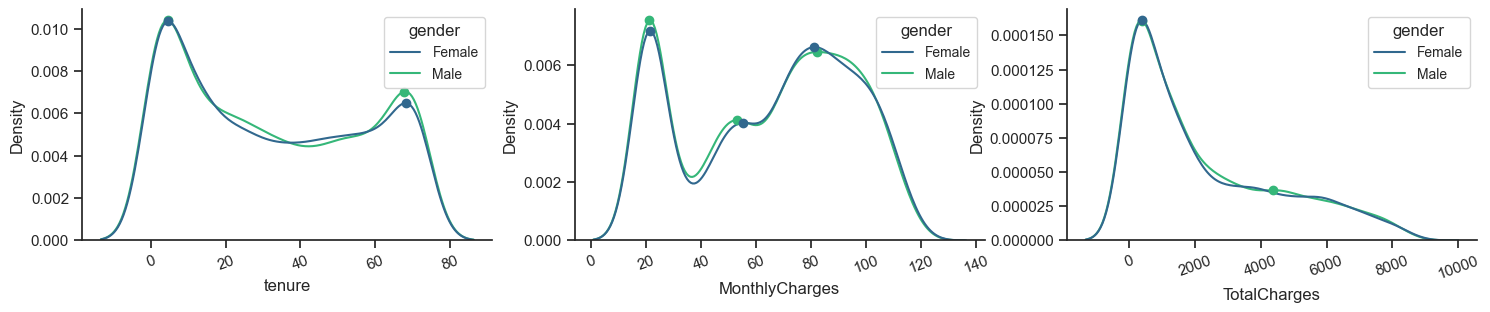

In [54]:
kdeplot_with_lines(names, data_df.columns[1])

$\cdot$ From the plot it is observed that gender doesn't show a big impact over any of the considered variables, since main peaks are localized in the same positions for both genders and have the same density.

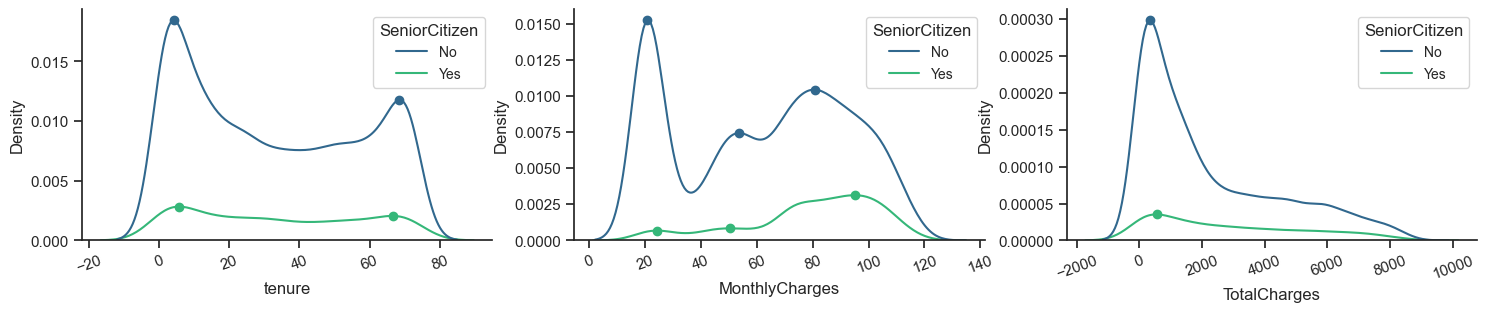

In [55]:
kdeplot_with_lines(names, data_df.columns[2])

From the plot it is observed that <i>SeniorCitizen</i> variable have a main effect over the density of the plot. It can be interpreted in the following way: A lot more people belongs to the <i>no</i> category. Inside the <i>no</i> category are two groups of people, one group do not last in the service (See tenure left side), and the other group composed by people that can last
between 30-80 months in the service.
People than belongs to the <i>yes</i> category tends to last longer in the service since not peak is apreciatted in the tenure values around 0. It is also interesting to observe that people in this category pays more in the Monthly basis. (See next Figure)

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

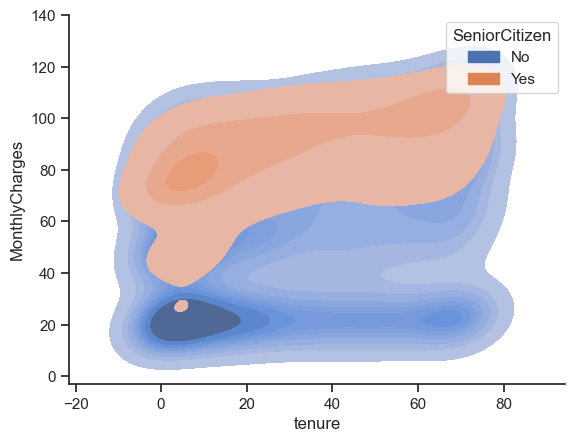

In [56]:
sns.kdeplot(x=data_df["tenure"] , y=data_df["MonthlyCharges"], hue=data_df["SeniorCitizen"], fill=True)

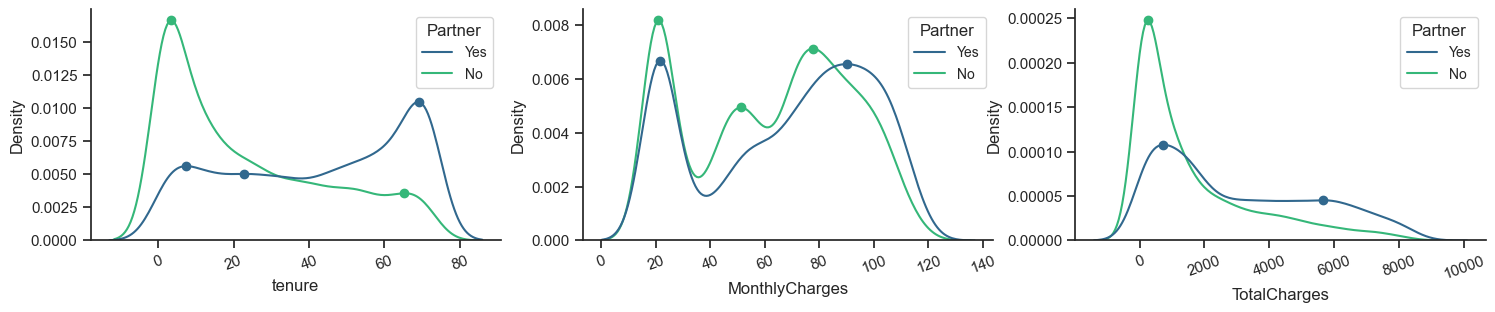

In [57]:
kdeplot_with_lines(names, data_df.columns[3])

From tha variable <i>Partner</i> an effect is observed in  <i>Tenure</i> and  <i>TotalCharges</i>.
For <i>Tenure</i> variable a person that do not have a partner tends to last least in the service, while people that have a partner
do not leave the service at the beginning, and can last a median value of 55 months.
For  <i>TotalCharges</i> it can be observed that people without partners hire cheaper services than people with partners.

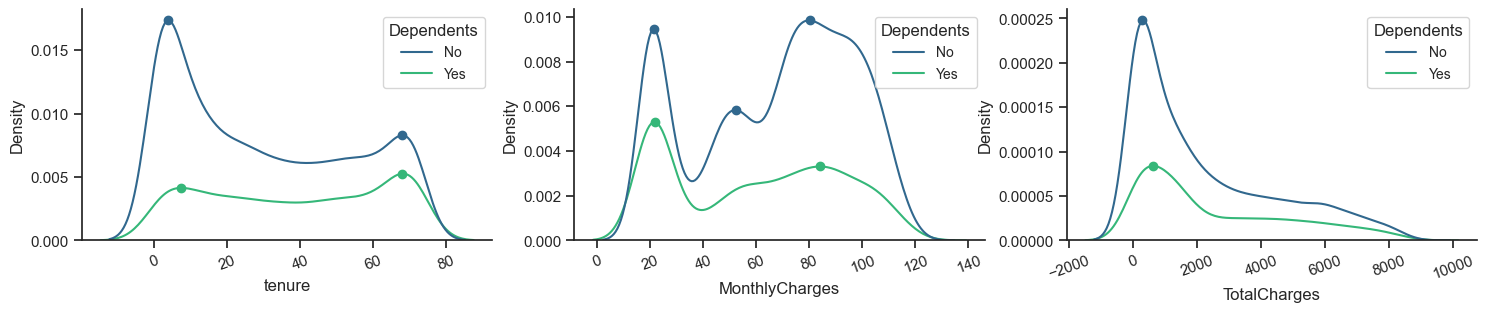

In [58]:
kdeplot_with_lines(names, data_df.columns[4])

 <i>Dependents</i> variable shows an effect just in the density shape, and it can be due to a data inbalance, so no interpretation is safe.

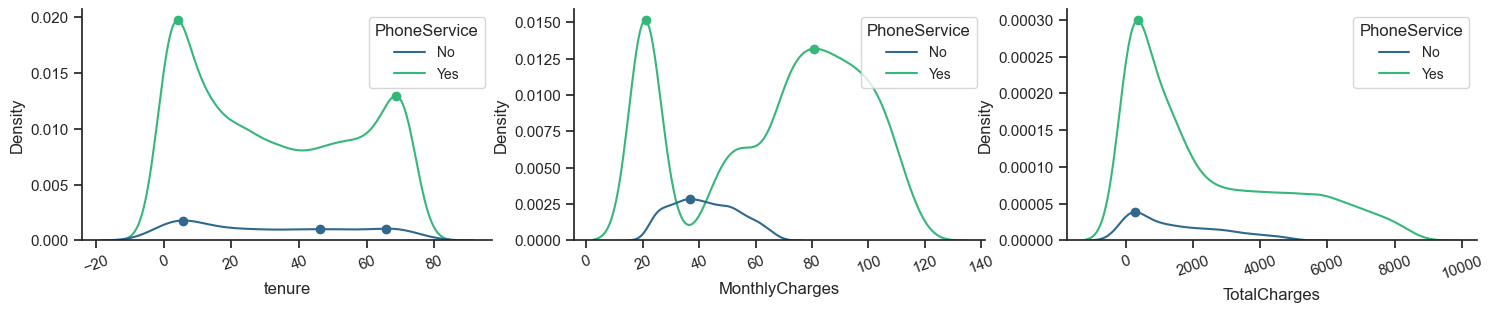

In [59]:
kdeplot_with_lines(names, data_df.columns[6])

 <i>PhoneService</i> effect cannot be apreciatted, mainly due to the effect that people who dont use the service cannot pay.

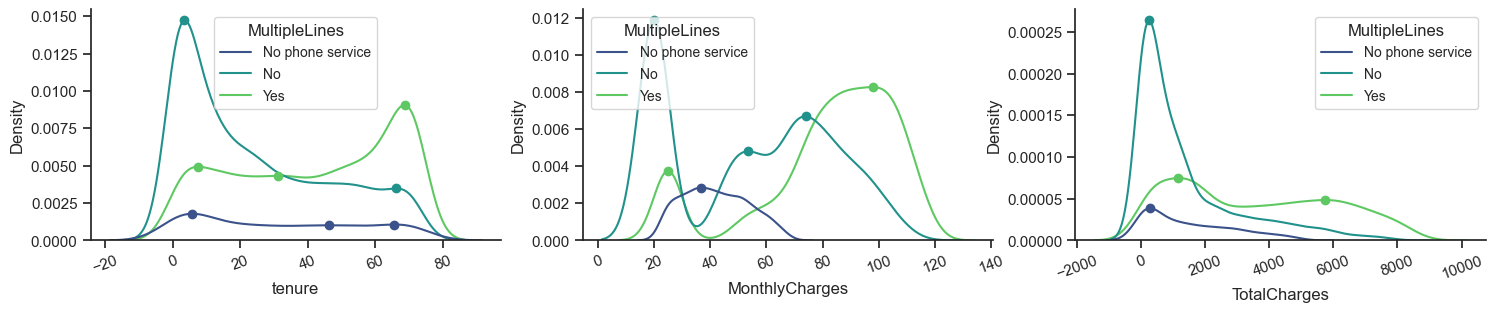

In [60]:
kdeplot_with_lines(names, data_df.columns[7])

In this case, inside our service of  <i>Multiple lines</i> it is observable that people with using the service tends to last longer than people who do not hire  <i>Multiple lines</i>.

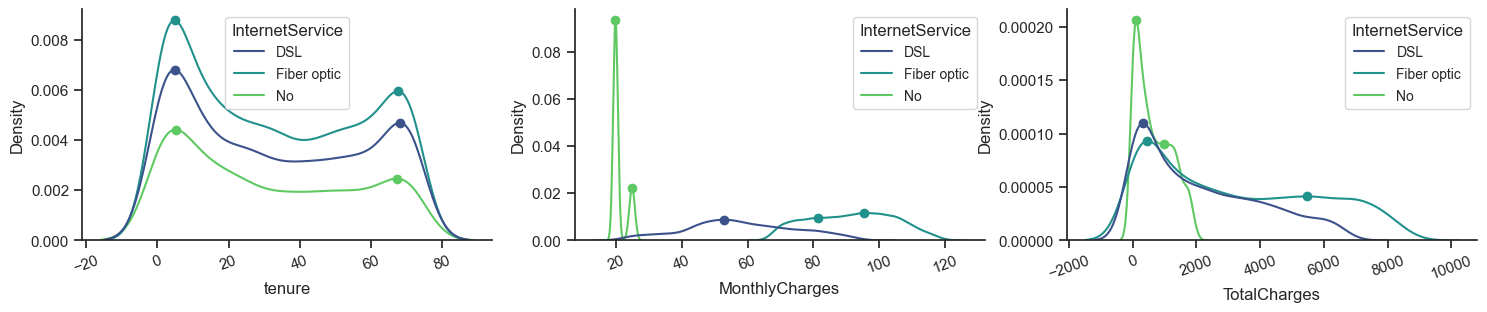

In [61]:
kdeplot_with_lines(names, data_df.columns[8])

No effect of  <i>InternetService</i> is observed.

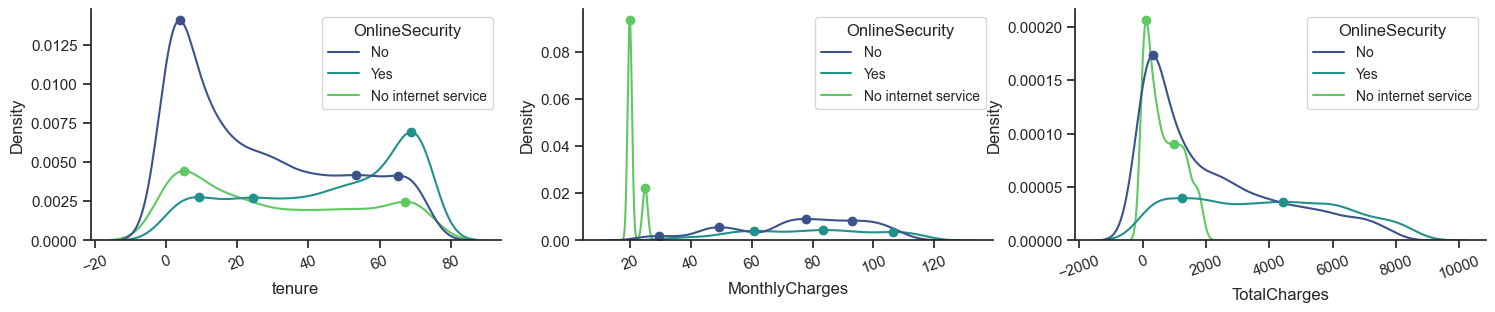

In [62]:
kdeplot_with_lines(names, data_df.columns[9])

People that hire  <i>OnlineSecurity</i> last longer in the service than people who do not hire this service.

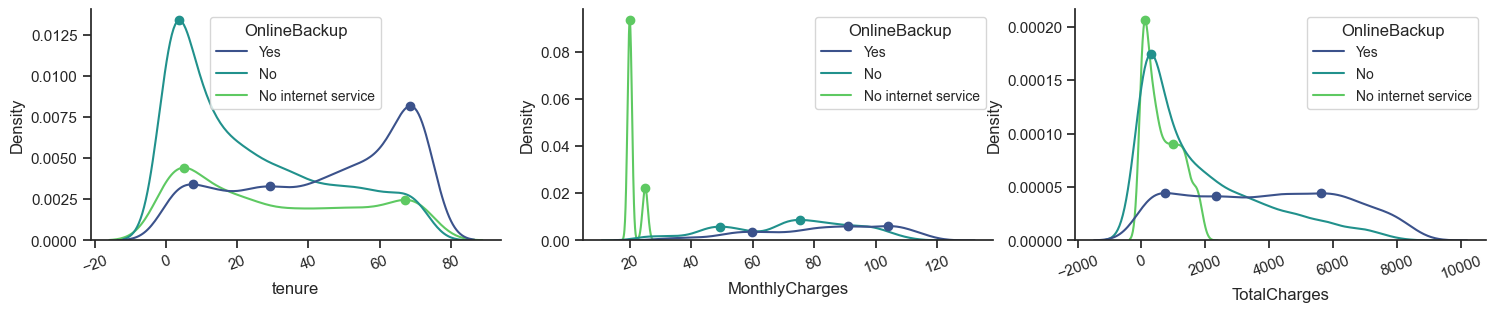

In [63]:
kdeplot_with_lines(names, data_df.columns[10])

People that hire  <i>OnlineBackup</i> last longer in the service than people who do not hire this service.

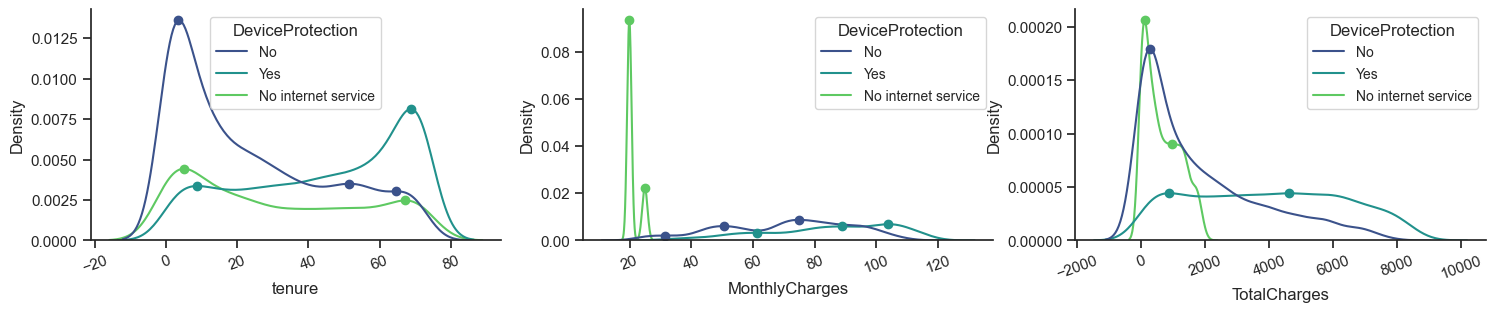

In [64]:
kdeplot_with_lines(names, data_df.columns[11])

People that hire  <i>DeviceProtection</i> last longer in the service than people who do not hire this service.

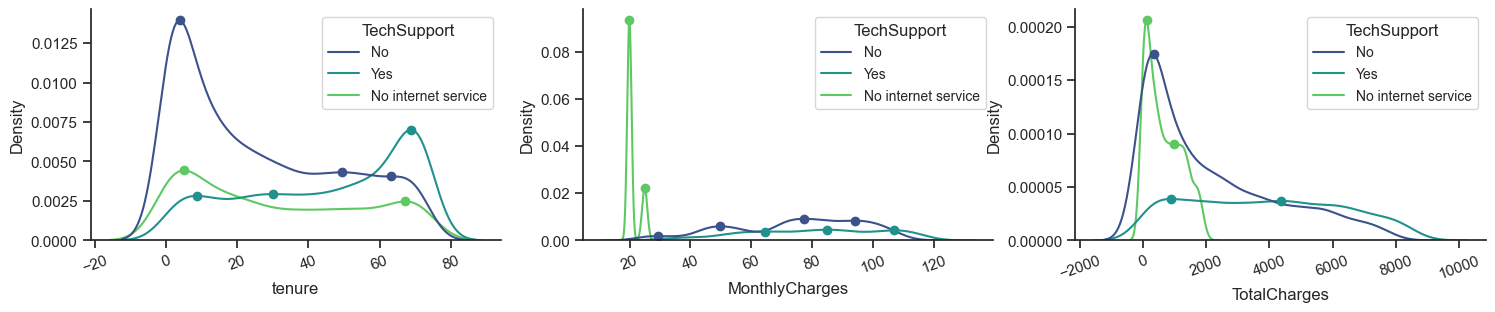

In [65]:
kdeplot_with_lines(names, data_df.columns[12])

People that hire  <i>TechSupport</i> last longer in the service than people who do not hire this service.

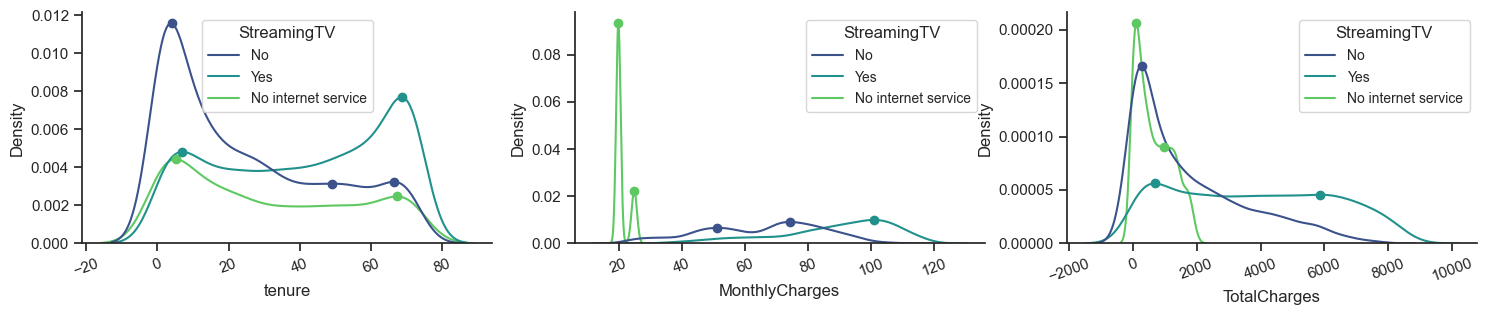

In [66]:
kdeplot_with_lines(names, data_df.columns[13])

People that hire  <i>StreamingTV</i> last longer in the service than people who do not hire this service.

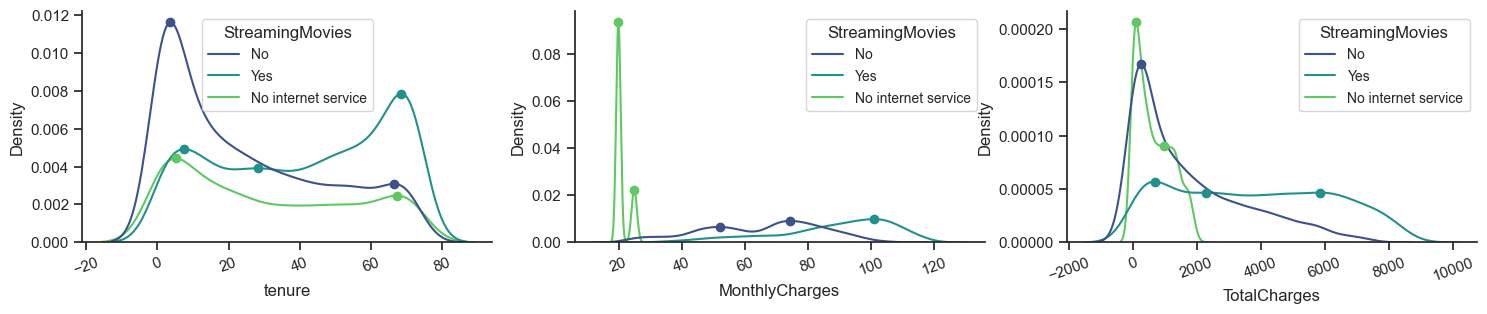

In [67]:
kdeplot_with_lines(names, data_df.columns[14])

People that hire  <i>StreamingMovies</i> last longer in the service than people who do not hire this service.

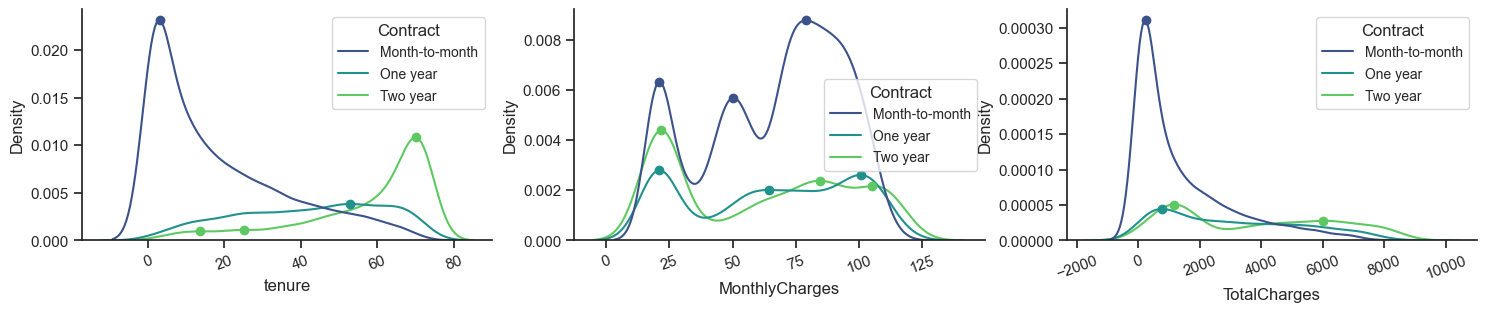

In [68]:
kdeplot_with_lines(names, data_df.columns[15])

People that have a <i>Month-to-Month</i> contract shows a low tenure, by inspecting all graphs,a theory of this type of clients is that they are float clients, they hire a service while it is a cheap promotion and then leave. It can be observed that people that have a contract of more than one year tends to last longer with the service, and the most usual MonthlyCharge acquired by them is 25 bucks.

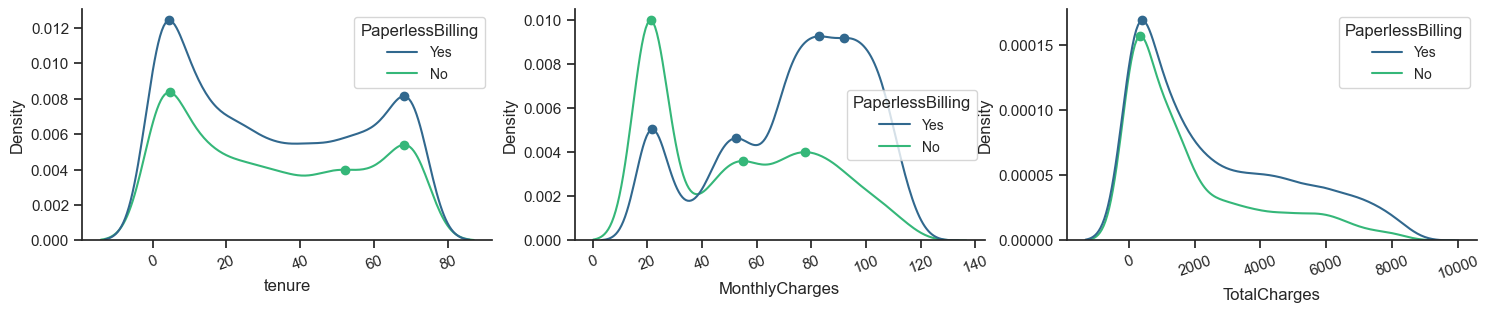

In [69]:
kdeplot_with_lines(names, data_df.columns[16])

From <i>PaperlessBilling</i> it is observed that people that use Paperless billing hire more expensive services. While people that use Paper billing methods usually hire more cheaper services.

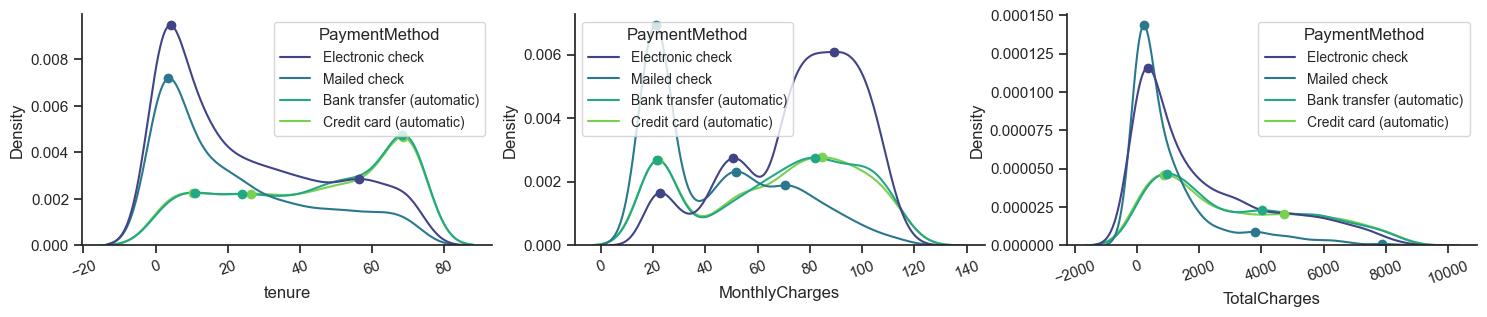

In [70]:
kdeplot_with_lines(names, data_df.columns[17])

From the <i>PaymentMethod<i> it can be observed that people than last longer in the service use Bank transfer or Credit card, both automatic methods. People that use electronic check or mailed check do not last long in the service.

# 3) Load Packages used to Clustering and Modelling

In [71]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import make_scorer, recall_score

import shap
import joblib

from kmodes.kmodes import KModes


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


### 3.1) Generation of a new DataFrame with OneHotEnconded variables

In [72]:
names = list(data_df.columns[[6,7,8,9,10,11,12,13,14,15,16,17]])

dd = data_df

for name in names: 
    dd = pd.get_dummies(dd, columns=[name], dtype=int)


Extraction of the duplicated columns

In [73]:
dd.drop(columns="customerID", inplace=True)
# dd.drop(columns= "InternetService_No", inplace= True)
dd.drop(columns= "OnlineSecurity_No internet service", inplace= True)
dd.drop(columns= "OnlineBackup_No internet service", inplace= True)
dd.drop(columns= "DeviceProtection_No internet service", inplace= True)
dd.drop(columns= "TechSupport_No internet service", inplace= True)
dd.drop(columns= "StreamingTV_No internet service", inplace= True)
dd.drop(columns= "StreamingMovies_No internet service", inplace= True)


### 3.2) Two ways of encoding variables, one using Pipeline and one directly applying encoding to columns

In [74]:
Ord_encoder = LabelEncoder()
Std_encoder = StandardScaler()
One_henconder= OneHotEncoder()

Ordinal_variables = ["gender", "SeniorCitizen","Partner","Dependents","Churn"]
Numeric_variables = ["tenure","MonthlyCharges","TotalCharges"]
One_hot_variables = ["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

def label_encoder_transformer(variables):
    encoded_variable = variables.apply(lambda col: Ord_encoder.fit_transform(col))
    return encoded_variable


# preprocessor = ColumnTransformer(transformers=[
#                                 ("Ordinal", FunctionTransformer(label_encoder_transformer, validate=False), Ordinal_variables),
#                                 ("Standar", Std_encoder, Numeric_variables),
#                                 ("Onehot", One_henconder, One_hot_variables)
#                                 ])
# dd = preprocessor.fit_transform(dd)

dd[Ordinal_variables] = dd[Ordinal_variables].apply(lambda col: Ord_encoder.fit_transform(col))
dd[Numeric_variables] = Std_encoder.fit_transform(dd[Numeric_variables])


### 3.3) Using enconded variables, we test K-means and GMM models to determine an aproximate number of clusters

In [75]:
kmeans = KMeans(n_clusters=4)
gmm    = GaussianMixture(n_components=4)
kmeans.fit(dd.drop(columns="Churn"))
gmm.fit(dd.drop(columns="Churn"))

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


GaussianMixture(n_components=4)

Evaluate the clustering results by <b>silhouette_score</b> with results in $[-1,1]$ <i>Higher is better</i> 


In [76]:
silhouette_avg = silhouette_score(dd.drop(columns="Churn"), kmeans.labels_)
silhouette_avg2= silhouette_score(dd.drop(columns="Churn"), gmm.predict(dd.drop(columns="Churn")))
print(silhouette_avg,silhouette_avg2)

0.20251614623006398 0.1598420147773722


Both results are higher than 0, which implies a decent clustering.

Now we try a more appropiate technique for categorical and numeric data, using the non-encoded data <b>data_df</b>

In [77]:
data_df[Numeric_variables] = Std_encoder.fit_transform(data_df[Numeric_variables])

In [78]:
data_new = data_df.drop("customerID" ,axis = 1)

In [79]:
data_new.dropna(inplace=True)

Importing and fitting <b>KPrototypes</b> from kmodes package

In [80]:
from kmodes.kprototypes import KPrototypes
kP = KPrototypes(n_clusters=3, init='Huang', n_init=1, verbose=True)
kP.fit(data_new.drop("Churn", axis=1), categorical= [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16])
kP.predict(data_new.drop("Churn", axis=1), categorical= [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16])

Init: initializing centroids


Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1731, ncost: 24358.08463597851
Run: 1, iteration: 2/100, moves: 475, ncost: 23845.209468888504
Run: 1, iteration: 3/100, moves: 147, ncost: 23826.881142006
Run: 1, iteration: 4/100, moves: 25, ncost: 23826.160238720146
Run: 1, iteration: 5/100, moves: 2, ncost: 23826.15487184443
Run: 1, iteration: 6/100, moves: 0, ncost: 23826.15487184443


array([1, 1, 1, ..., 1, 1, 2], dtype=uint16)

To find the appropiate number of cluster we applied the <b>elbow method</b>.

In [81]:

inertias = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=2)
    kmeans.fit(dd.drop(columns="Churn"))
    # inertias.append(kmeans.inertia_)

    kP = KPrototypes(n_clusters=k, init='Huang', n_init=1, verbose=True)
    kP.fit_predict(data_new.drop("Churn", axis=1), categorical=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16])
    # inertias.append(kP.cost_)
    
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(dd.drop(columns="Churn"))
    # bic_scores.append(gmm.bic(dd.drop(columns="Churn")))

    inertias_values = [kmeans.inertia_ , kP.cost_ , gmm.bic(dd.drop(columns="Churn"))]
    inertias.append(inertias_values)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 613, ncost: 32833.91883044702
Run: 1, iteration: 2/100, moves: 121, ncost: 32825.05000552425
Run: 1, iteration: 3/100, moves: 44, ncost: 32811.45153186695
Run: 1, iteration: 4/100, moves: 38, ncost: 32810.79523605616
Run: 1, iteration: 5/100, moves: 5, ncost: 32810.72534938282
Run: 1, iteration: 6/100, moves: 1, ncost: 32810.720981223356
Run: 1, iteration: 7/100, moves: 0, ncost: 32810.720981223356
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1661, ncost: 29215.85460229365
Run: 1, iteration: 2/100, moves: 1436, ncost: 24938.06731813139
Run: 1, iteration: 3/100, moves: 1203, ncost: 23843.434476741106
Run: 1, iteration: 4/100, moves: 128, ncost: 23834.011546806378
Run: 1, iteration: 5/100, moves: 8, ncost: 23833.93879394987
Run: 1, iteration: 6/100, moves: 4, ncost: 23833.92331869308
Run: 1, iteration: 7/100, 

Plotting the results for the three methods

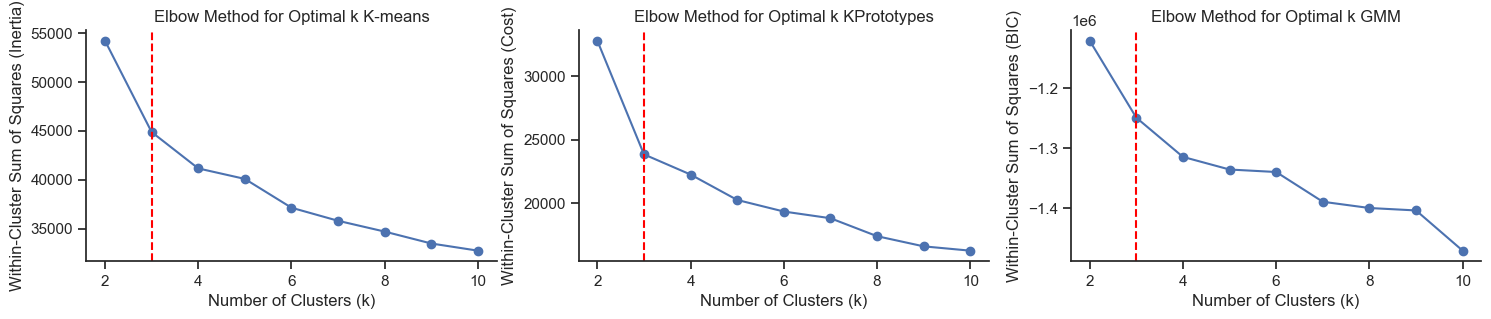

In [82]:
fig, ax = plt.subplots(1,3, figsize=(18,3))
axes = ax.ravel()
methods_str = ["K-means", "KPrototypes", "GMM"]
inertias_str = ["Inertia", "Cost", "BIC"]
inertias = pd.DataFrame(inertias, columns= inertias_str)

for index, axis in enumerate(axes):
    # Plot the elbow curve
    axis.plot(possible_k_values, inertias[inertias_str[index]], marker='o')
    axis.set_title(f'Elbow Method for Optimal k {methods_str[index]}')
    axis.set_xlabel('Number of Clusters (k)')
    axis.set_ylabel(f'Within-Cluster Sum of Squares ({inertias_str[index]})')
    axis.axvline(3, linestyle = "--", color = "red")

From the Figure it can be observed that <i>K-means<i> and <i>KPrototypes<i> gives a value of 3 as a good match, <i>GMM<i> shows a value of 4.

In this case, considering that <i>KPrototypes<i> is a more adequate method for clustering a mix of categorical and numerical data we choose 3 as the number of clusters.

#### Now we add the new clustering variable to the original dataset to understand the characteristics of the clusters

In [83]:
kP = KPrototypes(n_clusters=3, init='Huang', n_init=1, verbose=True)
new_groups = pd.DataFrame(kP.fit_predict(data_new.drop("Churn", axis=1), categorical=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]), columns=["G0"])
dd_new = pd.concat([data_new , new_groups], axis = 1)
dd_new_two = pd.concat([dd , new_groups], axis = 1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1281, ncost: 23833.27943918391
Run: 1, iteration: 2/100, moves: 123, ncost: 23826.1906021711
Run: 1, iteration: 3/100, moves: 6, ncost: 23826.15487184442
Run: 1, iteration: 4/100, moves: 0, ncost: 23826.15487184442


Drop NA values from the original Data set

In [84]:
dd_new.dropna(inplace=True)
dd_new_two.dropna(inplace=True)

We now group the data by the proposed cluster variables to determine which kind of customer is behind every cluster

In [85]:
filtered_data = dd_new_two.groupby("G0").agg(["mean" , "median"])

In [86]:
pd.set_option('display.max_columns', None)
filtered_data

gender        SeniorCitizen          Partner        Dependents         \
        mean median          mean median      mean median       mean median   
G0                                                                            
0   0.511935    1.0      0.035176    0.0  0.483040    0.0   0.417714    0.0   
1   0.485057    0.0      0.201839    0.0  0.697471    1.0   0.348046    0.0   
2   0.514242    1.0      0.198162    0.0  0.339051    0.0   0.207351    0.0   

      tenure           MonthlyCharges           TotalCharges            \
        mean    median           mean    median         mean    median   
G0                                                                       
0  -0.043546 -0.220905      -1.428479 -1.482464    -0.692885 -0.754729   
1   1.066829  1.164390       0.829233  0.952398     1.307478  1.250016   
2  -0.689442 -0.832064       0.144122  0.209474    -0.533137 -0.645788   

       Churn        PhoneService_No        PhoneService_Yes         \
        mean median            mean median             mean median   
G0                                                                   
0   0.072864    0.0        0.045226    0.0         0.954774    1.0   
1   0.147126    0.0        0.072644    0.0         0.927356    1.0   
2   0.438897    0.0        0.137825    0.0         0.862175    1.0   

   MultipleLines_No        MultipleLines_No phone service         \
               mean median                           mean median   
G0                                                                 
0          0.741206    1.0                       0.045226    0.0   
1          0.226207    0.0                       0.072644    0.0   
2          0.524655    1.0                       0.137825    0.0   

   MultipleLines_Yes        InternetService_DSL         \
                mean median                mean median   
G0                                                       
0           0.213568    0.0            0.045226    0.0   
1           0.701149    1.0            0.377471    0.0   
2           0.337519    0.0            0.466462    0.0   

   InternetService_Fiber optic        InternetService_No         \
                          mean median               mean median   
G0                                                                
0                     0.000000    0.0           0.954774    1.0   
1                     0.622529    1.0           0.000000    0.0   
2                     0.533538    1.0           0.000000    0.0   

   OnlineSecurity_No        OnlineSecurity_Yes        OnlineBackup_No         \
                mean median               mean median            mean median   
G0                                                                             
0           0.015075    0.0           0.030151    0.0        0.028266    0.0   
1           0.444598    0.0           0.555402    1.0        0.312184    0.0   
2           0.767534    1.0           0.232466    0.0        0.723737    1.0   

   OnlineBackup_Yes        DeviceProtection_No        DeviceProtection_Yes  \
               mean median                mean median                 mean   
G0                                                                           
0          0.016960    0.0            0.025754    0.0             0.019472   
1          0.687816    1.0            0.303448    0.0             0.696552   
2          0.276263    0.0            0.732925    1.0             0.267075   

          TechSupport_No        TechSupport_Yes        StreamingTV_No         \
   median           mean median            mean median           mean median   
G0                                                                             
0     0.0       0.015075    0.0        0.030151    0.0       0.040829    0.0   
1     1.0       0.423908    0.0        0.576092    1.0       0.274023    0.0   
2     0.0       0.773660    1.0        0.226340    0.0       0.657887    1.0   

   StreamingTV_Yes        StreamingMovies_No        StreamingMovies_Yes  

Customer type 0: This customer can be a young person, with or without dependents, positive to have almost all services, specially atracted to online services. They like paperless billing and electronic check as payment method. The most usual contract method for them is M-M, but if you retain them more than a year there is a higher probability of they staying in the service.
<ul>
  <li>Any gender</li>
  <li>The youngest among the other types</li>
  <li>The highest chance of have a partner</li>
  <li>The highest chance of have dependents</li>
  <li>Projected to have a positive tenure</li>
  <li>Can hire from basic stuff to packages</li>
  <li>Have the highest total charges among the other classes</li>
  <li>Will have phone service</li>
  <li>44% chance to have multiple lines</li>
  <li>45% chance Optic fiber, 35% DSL and 20% No service</li>
  <li>27% chance Online security, 50% No</li>
  <li>37% chance Online backup, 43% No</li>
  <li>37% chance Device protection, 43% No</li>
  <li>32% chance TechSupport, 48% No</li>
  <li>43% chance Streaming TV, 37% No</li>
  <li>43% chance Streaming Movies, 37% No</li>
  <li>52% M-M contract / 20% 1 year /  27% +2 years</li>
  <li>61% PaperlessBilling, 39% No</li>
  <li>32% Electronic-check 24%- 22%- 22%- others</li>
</ul>

Customer type 1: This customer can be a young person, with or without dependents, their focus is <i>Phone services</i> with posibilities of multiple lines, and basic Optic fiber internet, not specially atracted to online services. They like paperless billing and electronic check as payment method. The most usual contract method for them is M-M. Almost 60% of them preffers M-M contract and around 67% of them will live after a year.
<ul>
  <li>Any gender</li>
  <li>a litle bit older than type 0</li>
  <li>47% of having a partner</li>
  <li>30% of having dependents</li>
  <li>Projected to have a negative tenure, a short time client</li>
  <li>Monthly charges around mean - 3% and mean + 17%</li>
  <li>Total charges below the average</li>
  <li>Will have phone service (90%)</li>
  <li>40% chance to have multiple lines, and 50% No</li>
  <li>44% chance Optic fiber, 35% DSL and 21% No service</li>
  <li>27% chance Online security, 50% No</li>
  <li>33% chance Online backup, 45% No</li>
  <li>32% chance Device protection, 46% No</li>
  <li>27% chance TechSupport, 52% No</li>
  <li>37% chance Streaming TV, 42% No</li>
  <li>38% chance Streaming Movies, 40% No</li>
  <li>58% M-M contract / 21% 1 year /  21% +2 years</li>
  <li>58% PaperlessBilling, 42% No</li>
  <li>34% Electronic-check 23%- 21%- 21%- others</li>
</ul>

Customer type 3: This customer might be be the oldest, with or without dependents, their focus is <i>Phone services</i> with posibilities of multiple lines, and basic Optic fiber internet, not specially atracted to online services. They dont like paperless billing but like electronic check as payment method. The most usual contract method for them is M-M, 53% of them preffers M-M contract and around 58% of them will live after a year.
<ul>
  <li>Any gender</li>
  <li>a litle bit older than type 1</li>
  <li>48% of having a partner</li>
  <li>30% of having dependents</li>
  <li>Projected to have a a negative median tenure, but positive mean, which results in a mid-term client</li>
  <li>Monthly charges around mean - 6% and mean + 17%</li>
  <li>Total charges below the average but higher than type 2</li>
  <li>Will have phone service (91%)</li>
  <li>42% chance to have multiple lines, and 48% No</li>
  <li>42% chance Optic fiber, 34% DSL and 24% No service</li>
  <li>28% chance Online security, 47% No</li>
  <li>33% chance Online backup, 45% No</li>
  <li>34% chance Device protection, 42% No</li>
  <li>29% chance TechSupport, 47% No</li>
  <li>35% chance Streaming TV, 40% No</li>
  <li>36% chance Streaming Movies, 40% No</li>
  <li>53% M-M contract / 22% 1 year /  25% +2 years</li>
  <li>40% PaperlessBilling, 60% No</li>
  <li>34% Electronic-check 25%- 21%- 20%- others</li>
</ul>

From the results, apart from the profile of clients, we can conclude the next things: 
<ul>
  <li>There it's no a crystal clear age profile of clients who hire us</li>
  <li>Clients are segmented mainly due to tenure and what services are they susceptible to hire</li>
  <li>Type 1 of clients can be susceptible to become Type 2 for some online services</li>
  <li>Our best service is phone services</li>
  <li>Type 1 is susceptible to have multiple phone services</li>
  <li>Our most used internet service is optic fiber, but the one that produces more churn</li>
  <li>At least 50% of the clients start with a M-M contract</li>
  <li>Type 0 and Type 1 clients preffer PaperlessBilling</li>
  <li>An average of 54% of clients preffer automatic payment methods</li>
</ul>

## To visualize the clustering in another form we evaluate the shap values of predicted clusters


#### Import packages

In [100]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import shap

### Build a simple classiffier

In [99]:
clf_kp = XGBClassifier(n_estimators = 400)

cv_scores_kp = cross_val_score(clf_kp,dd_new_two.drop(columns = ["Churn","G0"]),dd_new_two["G0"], scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 0.9887657352418925


### With F1 score of 0.9887 we now know that the cluster algorithm made a good work, so we proceed to fit the model

In [103]:
clf_kp.fit(dd_new_two.drop(columns = ["Churn","G0"]),dd_new_two["G0"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Create the SHAP explainer

In [113]:
explainer = shap.TreeExplainer(clf_kp)
shap_values = explainer.shap_values(dd_new_two.drop(columns = ["Churn","G0"]))


[23:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


### Create the plot that explain the classes

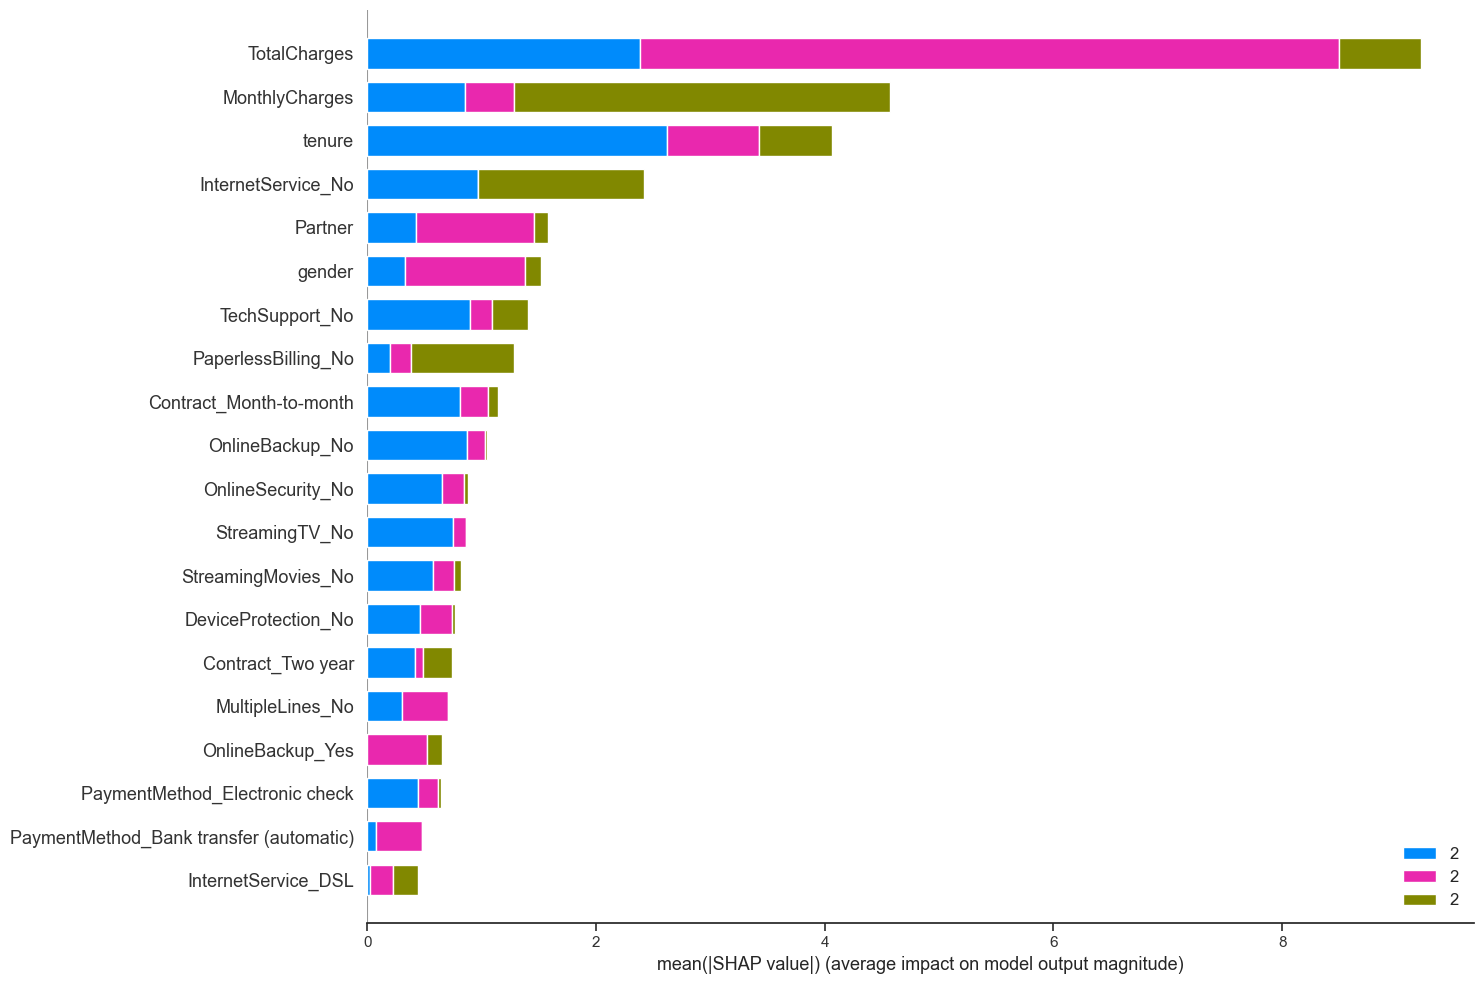

In [117]:
shap.summary_plot(shap_values, dd_new_two.drop(columns = ["Churn","G0"]), plot_type="bar", plot_size=(15, 10), class_names=dd_new_two["G0"].astype(str))
